# <font color='#728C11'>Transfer Learning for Grapevine Leaves Detection

## <font color='#728C11'>Project Overview</font>

This project leverages **Convolutional Neural Networks (CNN)** to classify different varieties of grapevine leaves in controlled environments. The objective is to automate the identification process of grapevine leaf types, enhancing efficiency and accuracy in agricultural settings. By employing advanced machine learning techniques, this model can support sorting, grading, and quality assessment of grapevine leaves.

### <font color='#728C11'> Key Features:
- **Dataset:**  
  The model is trained on a curated dataset of labeled grapevine leaf images. The dataset contains five distinct classifications:
  - **Ak**
  - **Ala_Idris**
  - **Buzgulu**
  - **Dimnit**
  - **Nazli**

- **Model Architecture:**  
  The model employs **VGG16**, a pre-trained CNN architecture, through **transfer learning**. This approach leverages the rich feature extraction capabilities of Modified DenseNet-121 while fine-tuning the model for the specific task of classifying these five varieties of grapevine leaves.

- **Preprocessing:**  
  Images were resized to 224x224, normalized, and converted to RGB format to ensure compatibility with the VGG16 input requirements. These preprocessing steps improve the model's generalization to unseen data.

## <font color='#728C11'> Requirements

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

import warnings
warnings.filterwarnings("ignore")


## <font color='#728C11'>Import Data

In [69]:
img_path='C:\\Users\\mvara\\Downloads\\Grapevine_Leaves_Image_Dataset'
os.listdir(img_path)

['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']

## <font color='#728C11'> Transfer Learning with VGG16

In [87]:
from tensorflow.keras.applications import DenseNet121


# Define dataset parameters
data_dir = 'C:\\Users\\mvara\\Downloads\\Grapevine_Leaves_Image_Dataset'
img_width, img_height = 224,224
batch_size = 32

# Enhanced ImageDataGenerator with data augmentation for training
datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Training data generator (with shuffling)
train_datagen = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

# Validation data generator (without shuffling)
val_datagen = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

# Determine the number of classes from the data
num_classes = len(train_datagen.class_indices)

# Load DenseNet-121 base model with pretrained ImageNet weights (exclude top layers)
base_model = DenseNet121(
    weights='imagenet', 
    input_shape=(img_width, img_height, 3), 
    include_top=False
)



Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [88]:
model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [90]:
model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1024)                │      51,381,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,196,625 (614.92 MB)

 Trainable params: 51,386,373 (196.02 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 102,772,748 (392.05 MB)

In [89]:
history=model.fit(train_datagen,epochs=25,validation_data=test_datagen)

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 131s 7s/step - accuracy: 0.2749 - loss: 55.7281 - val_accuracy: 0.4000 - val_loss: 19.2574
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.4591 - loss: 11.7624 - val_accuracy: 0.5600 - val_loss: 3.8999
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.5902 - loss: 3.1469 - val_accuracy: 0.7600 - val_loss: 0.9844
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.6984 - loss: 1.4785 - val_accuracy: 0.7100 - val_loss: 0.9274
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.7243 - loss: 1.1585 - val_accuracy: 0.7200 - val_loss: 0.9196
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - accuracy: 0.7370 - loss: 0.8693 - val_accuracy: 0.6500 - val_loss: 1.3794
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 74s 6s/step - accuracy: 0.7834 - loss: 0.7397 - val_accuracy: 0.8700 - val_loss: 0.5511
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.8477 - loss: 0.3778 - val_accuracy: 0.8100 - val_

In [91]:
model.save('cnn_model.h5')

## <font color='#728C11'> Model Overview

In [92]:
history.history['accuracy'][-1]

0.925000011920929

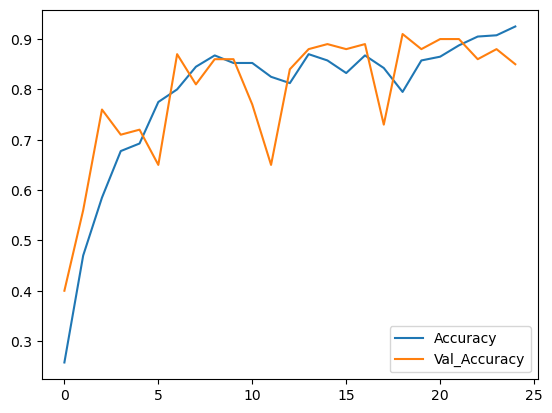

In [93]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

## <font color='#728C11'> Testing the Model

In [94]:
test_labels = test_datagen.classes
predictions = model.predict(test_datagen)
predicted_classes = np.argmax(predictions, axis=1)  
accuracy_score(test_labels, predicted_classes)

4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step


0.85

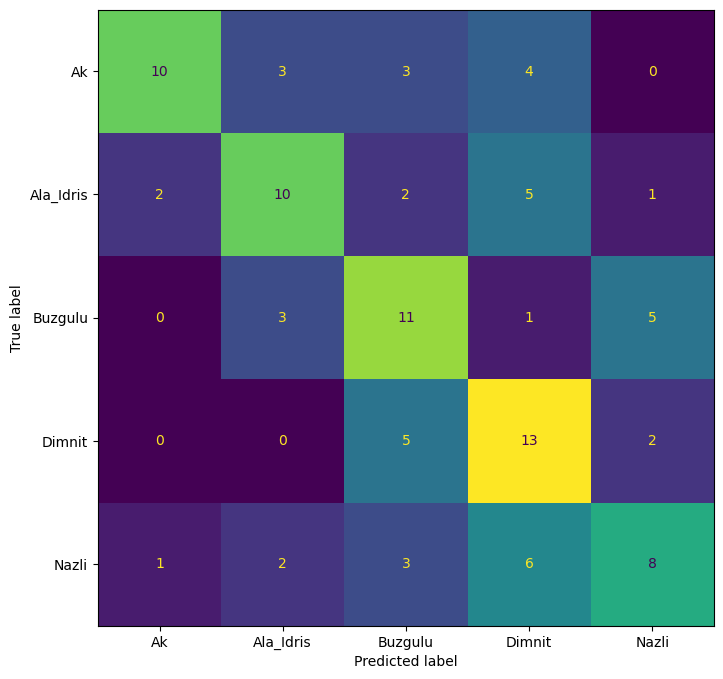

In [54]:
cm = confusion_matrix(test_labels, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_datagen.class_indices.keys())
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap="viridis", colorbar=False);

In [27]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

## <font color='#728C11'>Project Results</font>

The model achieved an accuracy score of **84%**, demonstrating strong performance in classifying the five types of grapevine leaves. The confusion matrix shows that the model performs well for most classes, with **Ak**, **Ala_Idris**, and **Buzgulu** being classified accurately. Some misclassifications occurred between **Ak** and **Ala_Idris**, but these are relatively minor.